In [132]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [133]:
# Reading the CSV file
file_path = '/Users/ouyangyingrun/Desktop/NVDA1.csv'

df = pd.read_csv(file_path)
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-28,424.600006,434.459991,421.149994,430.890015,430.890015,42466300
2023-09-29,438.269989,441.440002,433.070007,434.989990,434.989990,39722100
2023-10-02,440.299988,451.750000,438.609985,447.820007,447.820007,43329800
2023-10-03,448.079987,451.299988,432.459991,435.170013,435.170013,47085000
2023-10-04,437.420013,441.429993,432.920013,440.410004,440.410004,36182100


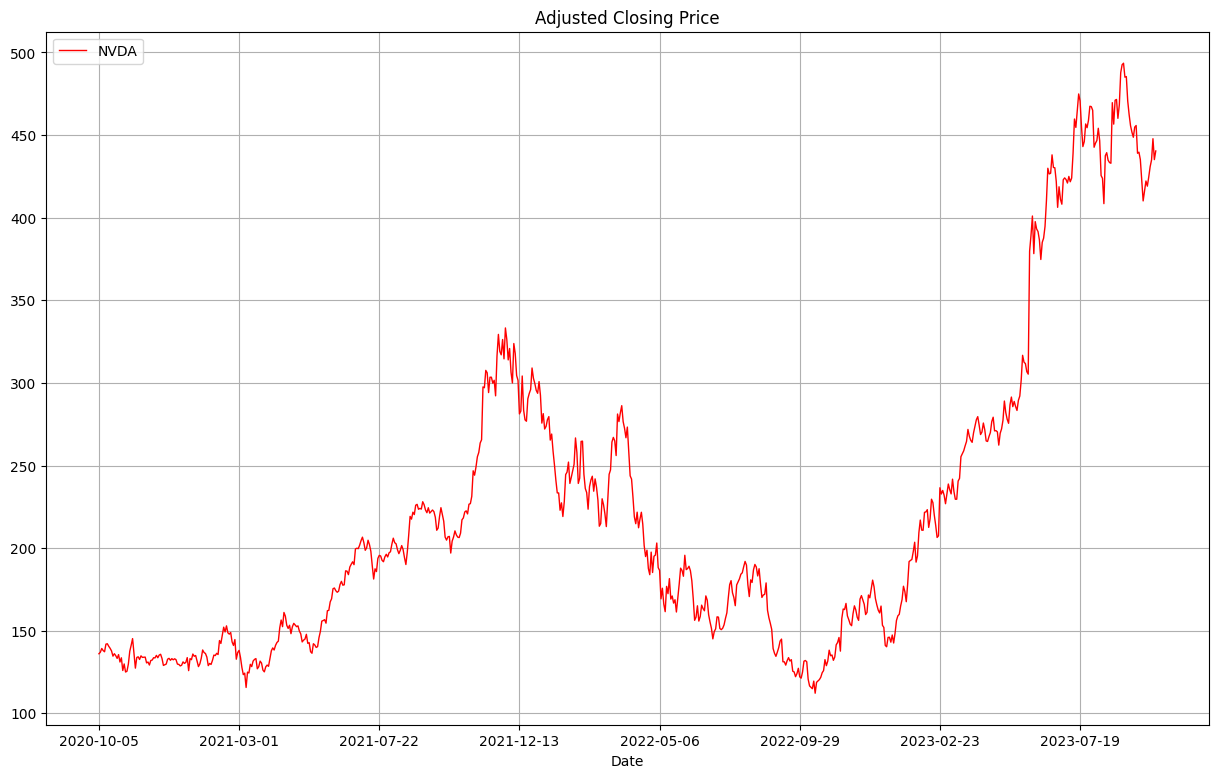

In [134]:
# Visualizing the stock prices

df['Adj Close'].plot(label='NVDA', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()


In [135]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df['Adj Close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

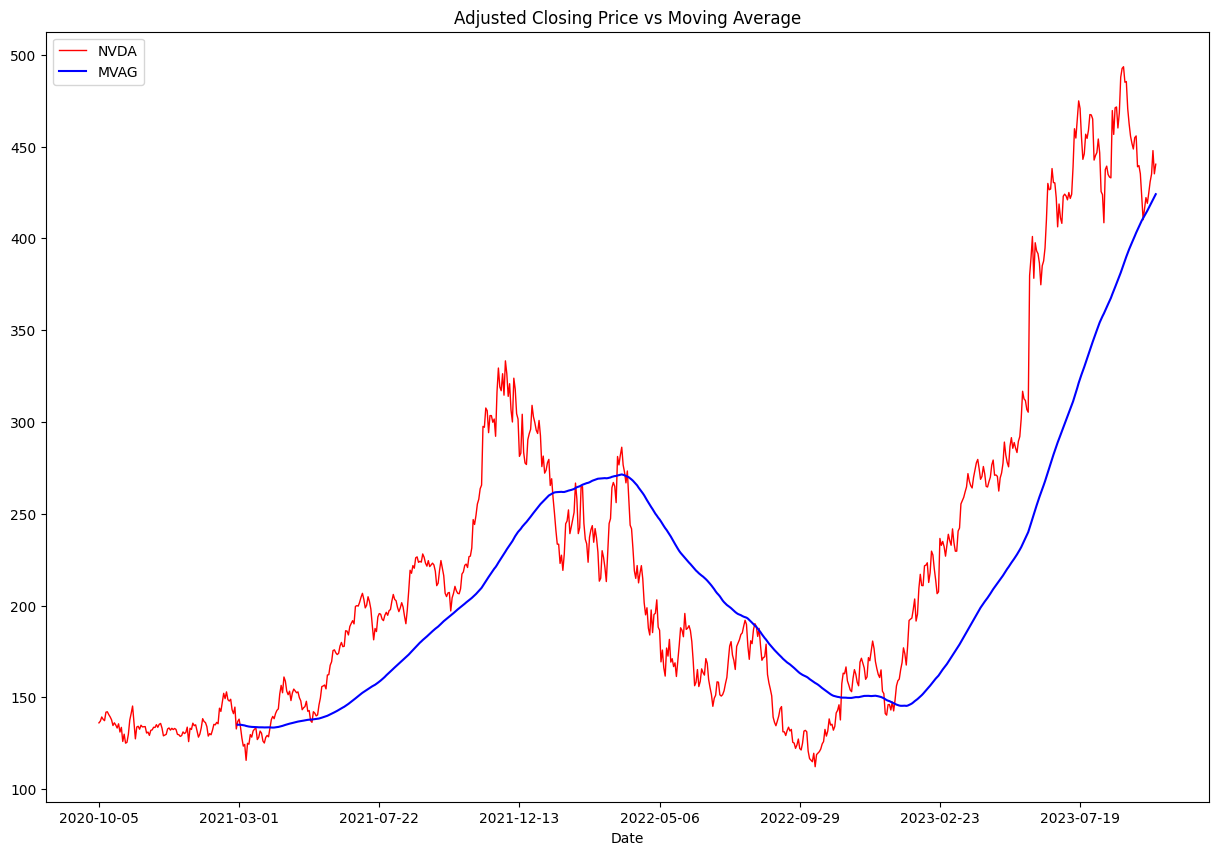

In [136]:

# Visualizing Rolling Mean and Adjusted Closing Price together

df['Adj Close'].plot(label='NVDA', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

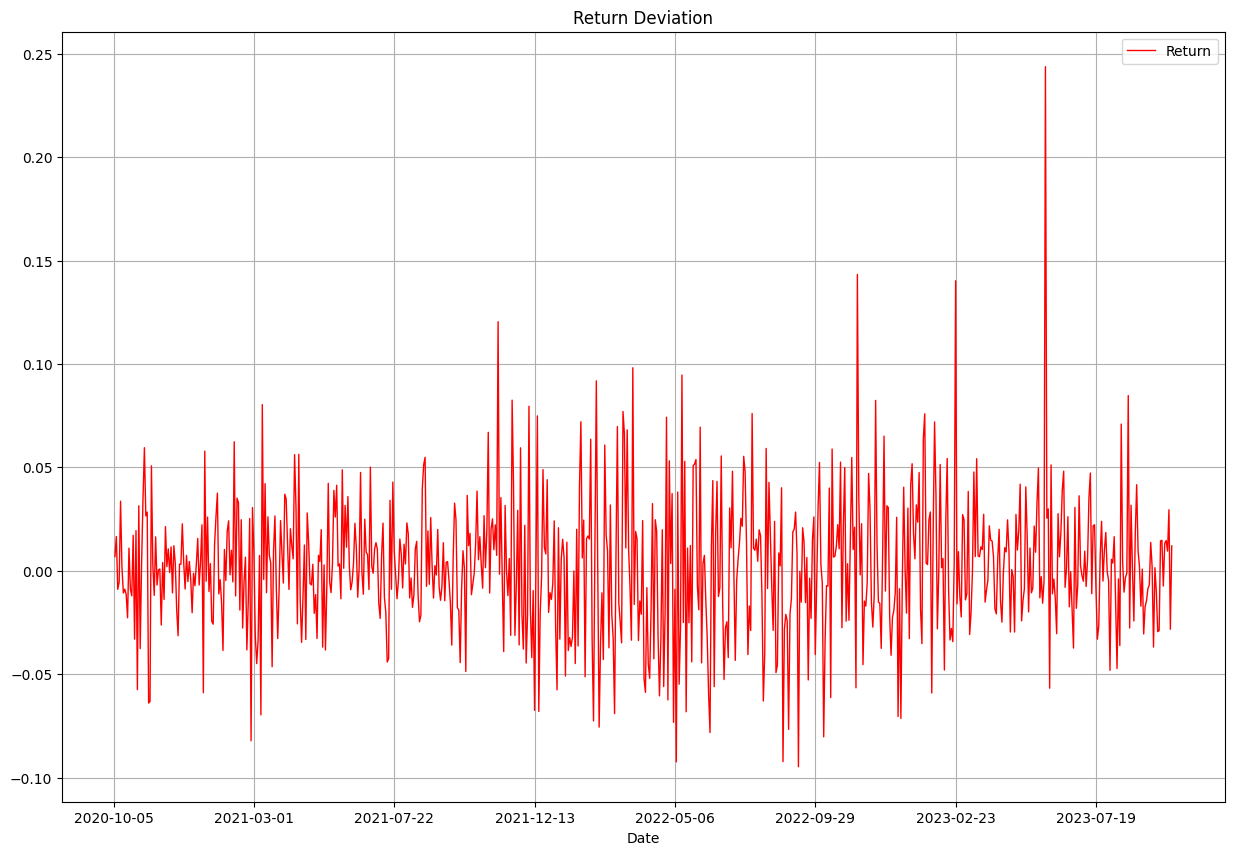

In [137]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [138]:
# Number of days for which to predict the stock prices

predict_days = 30

In [139]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['Adj Close'].shift(-predict_days)
print(df['Prediction'])
print(df['Adj Close'])

Date
2020-10-05    134.820587
2020-10-06    133.892899
2020-10-07    133.957718
2020-10-08    134.072433
2020-10-09    130.556091
                 ...    
2023-09-28           NaN
2023-09-29           NaN
2023-10-02           NaN
2023-10-03           NaN
2023-10-04           NaN
Name: Prediction, Length: 755, dtype: float64
Date
2020-10-05    136.089996
2020-10-06    137.027664
2020-10-07    139.297104
2020-10-08    138.047668
2020-10-09    137.289536
                 ...    
2023-09-28    430.890015
2023-09-29    434.989990
2023-10-02    447.820007
2023-10-03    435.170013
2023-10-04    440.410004
Name: Adj Close, Length: 755, dtype: float64


In [140]:
# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(725, 6)


In [141]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]  # Size up to predict_days
# print(y)
print(y.shape)


(725,)


In [142]:
# Splitting the data into Training data & Testing data
X = df.drop(['Prediction'], axis=1).values
X = X[:-predict_days]  # Size up to predict_days

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(580, 6)
(580,)
(145, 6)
(145,)


1. Linear Regression
Building first model of regression 

In [143]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm


LinearRegression()

In [144]:
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.79484452116494


In [145]:
# Define the Real & Prediction Values
X_predict = df.drop(['Prediction'], axis=1).tail(predict_days).values
linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(X)

In [146]:
# Defining some Parameters

predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

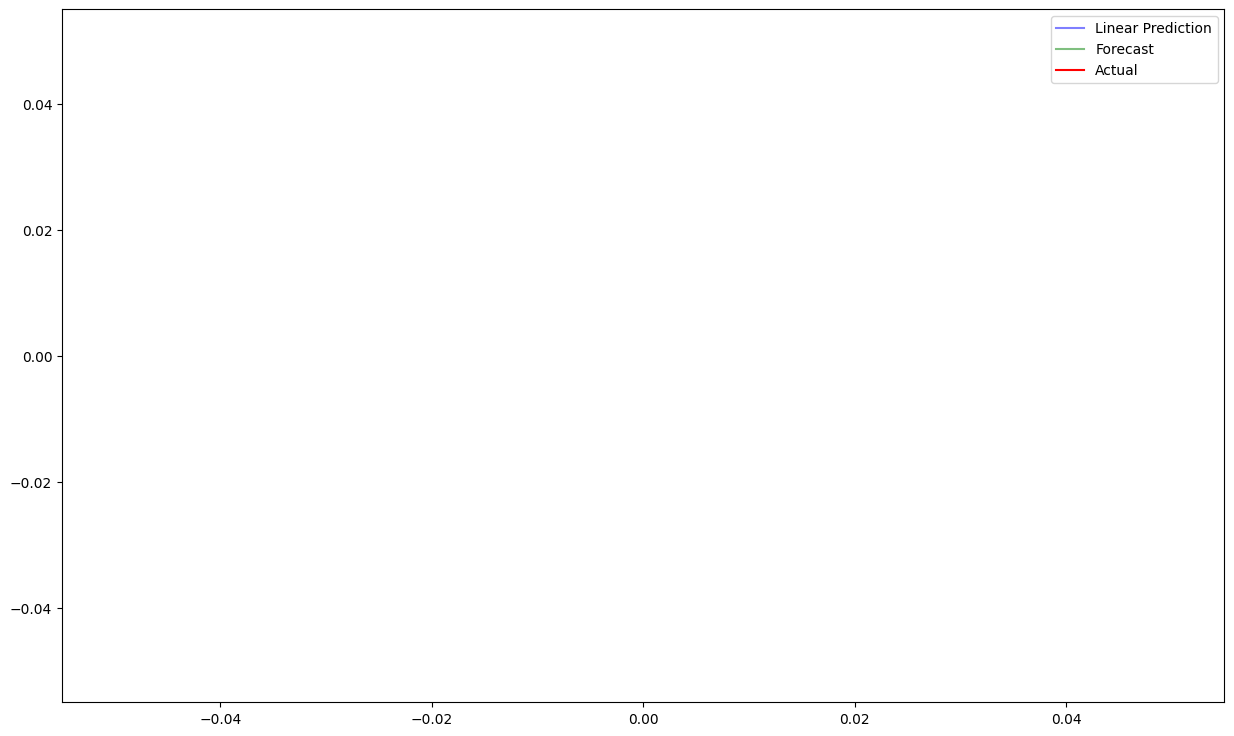

In [147]:
# Plotting the Actual and Prediction Prices
plt.figure(figsize=(15, 9))

min_length = min(len(df.index[display_at:]), len(linear_model_real_prediction[display_at:]))

plt.plot(df.index[display_at:display_at+min_length], linear_model_real_prediction[display_at:display_at+min_length],
         label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates[:min_length], linear_model_predict_prediction[:min_length],
         label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:display_at+min_length], df['Close'][display_at:display_at+min_length],
         label='Actual', color='red')

     


plt.legend()
plt.show()




In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate predictions for the test set
y_pred = linear_model.predict(X_test)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Squared Error (MSE): 1756.6355445128202
Mean Absolute Error (MAE): 31.332596101963826
Root Mean Squared Error (RMSE): 41.9122362146524


2. Rigid model

In [149]:
# Defining the Ridge Regression Model

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)     # Training the algorithm


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.21742e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [150]:
# Score of the Ridge Regression Model (Using the Test Data)

ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.7895697553016411


In [151]:

# Define the Real & Prediction Values
X_predict_ridge = df.drop(['Prediction'], axis=1).tail(predict_days).values

ridge_model_predict_prediction = ridge_model.predict(X_predict_ridge)
ridge_model_real_prediction = ridge_model.predict(X)

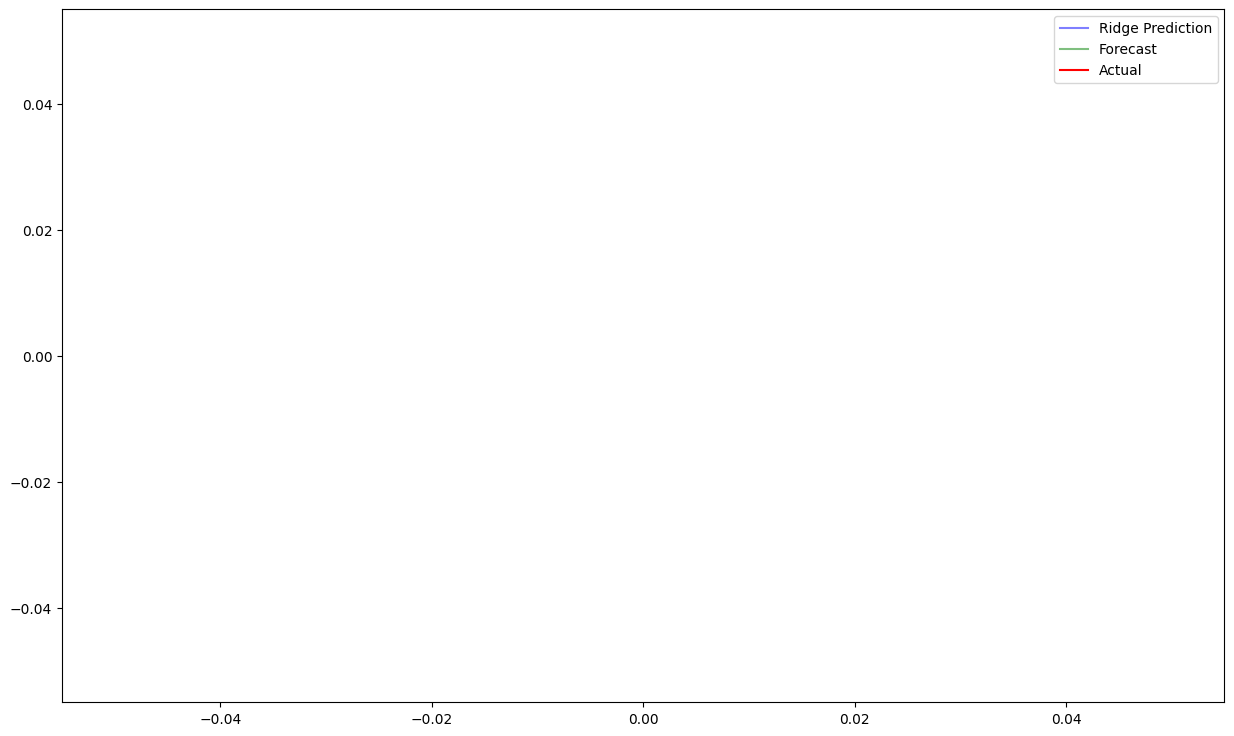

In [152]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))

# Ensure both arrays have the same length for plotting
min_length_ridge = min(len(df.index[display_at:]), len(ridge_model_real_prediction[display_at:]))

plt.plot(df.index[display_at:display_at+min_length_ridge], ridge_model_real_prediction[display_at:display_at+min_length_ridge],
         label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates[:min_length_ridge], ridge_model_predict_prediction[:min_length_ridge],
         label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:display_at+min_length_ridge], df['Close'][display_at:display_at+min_length_ridge],
         label='Actual', color='red')
plt.legend()





3. Lasso Regression
Building Third model of regression - Lasso Regression

In [153]:
# Defining the Lasso Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.915e+05, tolerance: 5.391e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [154]:

# Score of the Lasso Regression Model (Using the Test Data)

lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)


Lasso Model score: 0.739704220264285


In [155]:
# Define the Real & Prediction Values
X_predict_lasso = df.drop(['Prediction'], axis=1).tail(predict_days).values

lasso_model_predict_prediction = lasso_model.predict(X_predict_lasso)
lasso_model_real_prediction = lasso_model.predict(X)

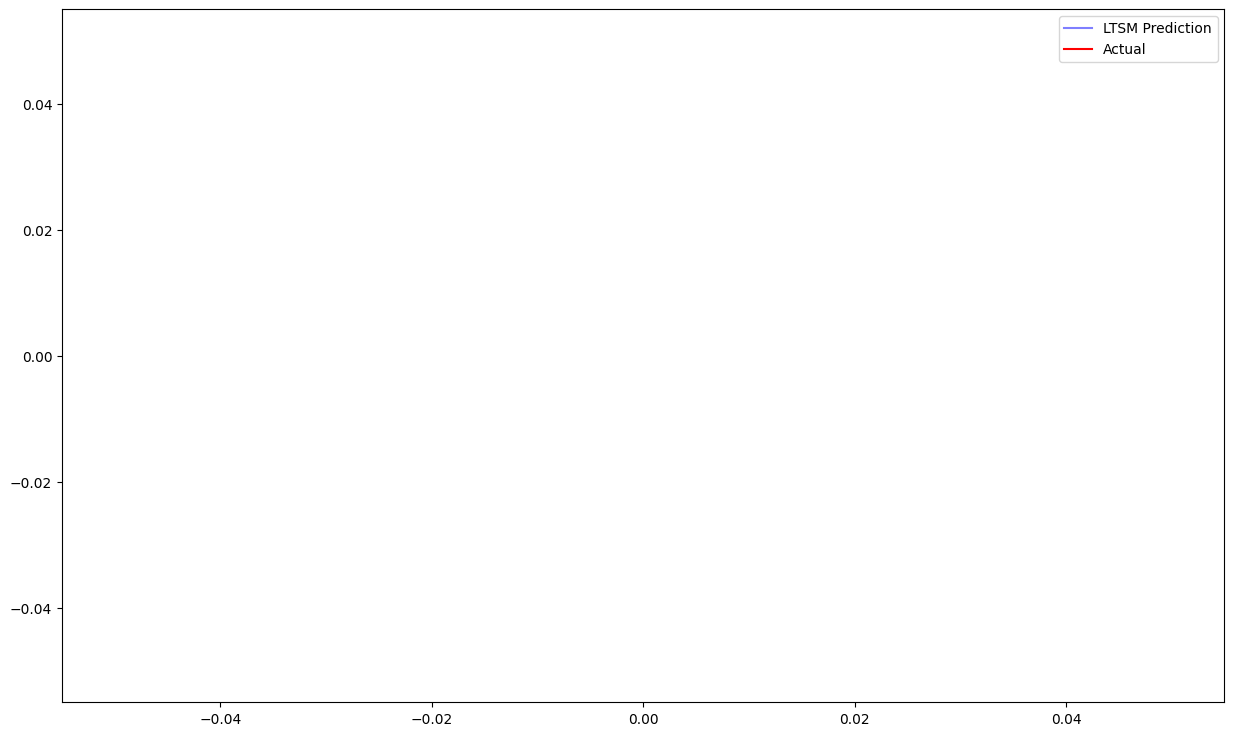

In [156]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))

# Ensure both arrays have the same length for plotting
min_length_lasso = min(len(df.index[display_at:]), len(lasso_model_real_prediction[display_at:]))

plt.plot(df.index[display_at:display_at+min_length_lasso], lasso_model_real_prediction[display_at:display_at+min_length_lasso],
         label='LTSM Prediction', color='blue', alpha=alpha)
plt.plot(df.index[display_at:display_at+min_length_lasso], df['Close'][display_at:display_at+min_length_lasso],
         label='Actual', color='red')
plt.legend()

In [157]:
# Best Performance of the Regressor Models

best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Linear Regression Model with the score of 79.484452116494%.
